# Medical Data Visualizer

In [23]:
# External imports
import numpy as np
import pandas as pd

In [24]:
# Import data
df = pd.read_csv("medical_examination.csv")

In [25]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [26]:
# Add and normalize the overweight value
bmi = df.weight/(0.01*df.height)**2 - 25; bmi[bmi > 0] = 1; bmi[bmi <= 0] = 0
df["overweight"] = bmi.astype(int)

In [27]:
# Normalize cholesterol and gluc values
pd.set_option('mode.chained_assignment', None) # Disable the warnnings
df.cholesterol -= 1; df.cholesterol[df.cholesterol > 0] = 1
df.gluc -= 1; df.gluc[df.gluc > 0] = 1
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [28]:
# Create appropiate DataFrame to plot
features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat = pd.melt(df, id_vars= ["cardio"], value_vars=features).sort_values(by=['variable'])
df_cat.head()

,cardio,variable,value
349997,1,active,0
303338,0,active,1
303337,1,active,1
303336,1,active,1
303335,0,active,0


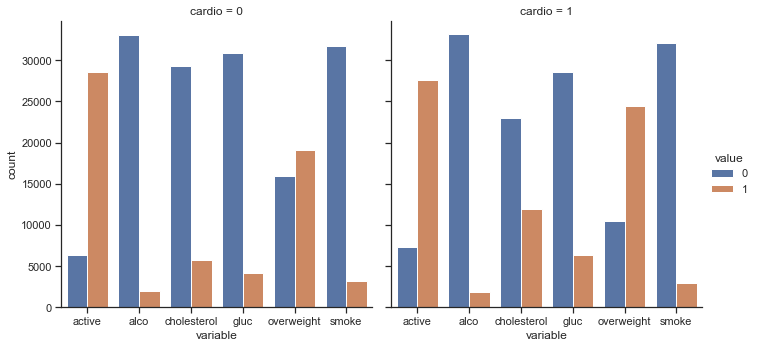

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

g = sns.catplot(x="variable", hue="value", col="cardio", data=df_cat, kind="count")

In [44]:
# Clean the data for plotting the correlation matrix
per_025_hei = df['height'].quantile(0.025)
per_975_hei = df["height"].quantile(0.975)
per_025_wei = df['weight'].quantile(0.025)
per_975_wei = df["weight"].quantile(0.975)

df_clean = df.query(
    "(ap_lo <= ap_hi) & (height >= @per_025_hei) & (height <= @per_975_hei) & (weight >= @per_025_wei) & (weight <= @per_975_wei)"
)
df_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [45]:
# Calculate correlation matrix
df_corr = df_clean.corr()
df_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


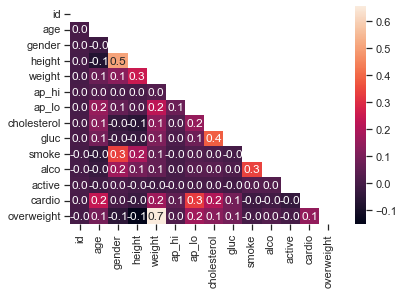

In [46]:
# Plot the correlation matrix
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax = sns.heatmap(df_corr, mask=mask, annot=True, fmt=".1f")